In [1]:
import numpy as np
import matplotlib.pyplot as plt

<font color="lightblue">Model<font>

In [9]:
max_len = 200 
d_model = 64 
dims = np.arange(d_model)
positions = np.arange(0, 200)

<font color="lightblue">The first diagram shows positional encoding changes with position for several fixed embedding dimensions.<font>

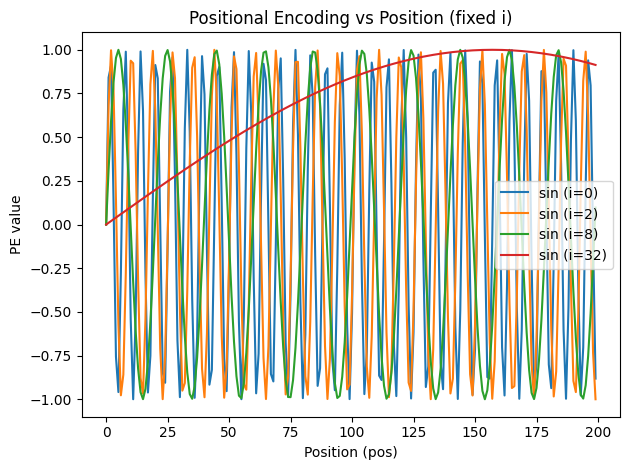

In [19]:
i_values = [0, 2, 8, 32]

plt.figure()

for i in i_values:
    denom = np.power(10000.0, (2 * (i // 2)) / d_model)
    if i % 2 == 0:
        pe = np.sin(positions / denom)
        label = f"sin (i={i})"
    else:
        pe = np.cos(positions / denom)
        label = f"cos (i={i})"
    plt.plot(positions, pe, label=label)

plt.xlabel("Position (pos)")
plt.ylabel("PE value")
plt.title("Positional Encoding vs Position (fixed i)")
plt.legend()
plt.tight_layout()
plt.show()


<font color="lightblue">The second diagram shows how positional encoding is distributed across embedding dimensions for fixed positions.<font>

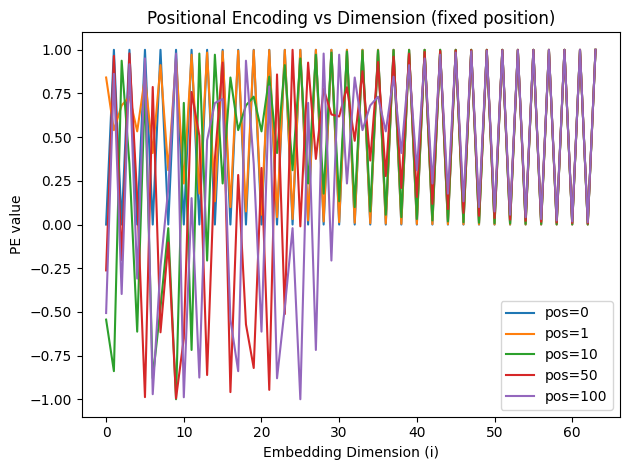

In [15]:
fixed_positions = [0, 1, 10, 50, 100]

plt.figure()

for pos in fixed_positions:
    denom = np.power(10000.0, (2 * (dims // 2)) / d_model)
    angles = pos / denom

    pe = np.zeros(d_model)
    pe[0::2] = np.sin(angles[0::2])  # even dimensions
    pe[1::2] = np.cos(angles[1::2])  # odd dimensions

    plt.plot(dims, pe, label=f"pos={pos}")

plt.xlabel("Embedding Dimension (i)")
plt.ylabel("PE value")
plt.title("Positional Encoding vs Dimension (fixed position)")
plt.legend()
plt.tight_layout()
plt.show()


<font color="lightblue">This is the heatmap for PE across Position (pos) and Embedding Dimension (i)<font>

In [2]:
def positional_encoding(max_len: int, d_model: int) -> np.ndarray:
    """
    Sinusoidal positional encodings.
    Output shape: (max_len, d_model)
    """
    pe = np.zeros((max_len, d_model), dtype=np.float64)

    positions = np.arange(max_len)[:, None]   # (max_len, 1)
    dims = np.arange(d_model)[None, :]        # (1, d_model)

    # denominator: 10000^(2i/d_model) but i is paired (even/odd share same scale)
    div_term = np.power(10000.0, (2 * (dims // 2)) / d_model)
    angles = positions / div_term

    pe[:, 0::2] = np.sin(angles[:, 0::2])  # even dims
    pe[:, 1::2] = np.cos(angles[:, 1::2])  # odd dims
    return pe



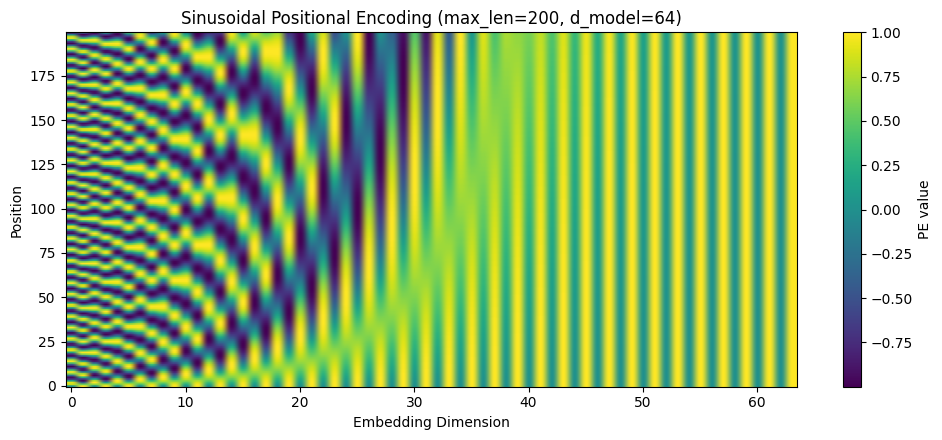

In [13]:
pe = positional_encoding(max_len, d_model)

plt.figure(figsize=(10, 4.5))
plt.imshow(pe, aspect='auto', origin='lower')
plt.title(f"Sinusoidal Positional Encoding (max_len={max_len}, d_model={d_model})")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.colorbar(label="PE value")
plt.tight_layout()
plt.show()
